# The "Perfect" Release Point: Data collection and initial exploration
### By: Katie Collier

## Step 1. Setup and importing the data and codebooks

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from IPython.display import HTML, Markdown, display
import seaborn as sns
import numpy as np
import shapely
import json
import plotly

### Load the data

In [3]:
garzaR_df = pd.read_csv('../data/Original_Data_Files/Ralph_Garza.csv')

In [4]:
HTML(garzaR_df.to_html())

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2021-09-30,92.3,-1.03,5.66,"Garza Jr., Ralph",605612,621248,double,hit_into_play,NaN,NaN,NaN,NaN,7,Harold Castro doubles (13) on a sharp line drive to center fielder Byron Buxton. Jonathan Schoop scores. Jeimer Candelario to 3rd.,R,L,R,MIN,DET,X,8.0,line_drive,0,2,2021,-0.62,0.95,-0.43,2.05,NaN,570731.0,600869.0,0,8,Top,99.30,54.75,NaN,NaN,641598,NaN,NaN,2.859469,-134.497073,-5.488645,-8.130956,25.479549,-19.684816,3.30,1.50,289.0,101.0,14.0,92.6,2077,6.1,632285,621248,641598,593934,593871,518626,624503,595909,621439,596146,54.37,0.780,0.767,1.25,1.0,1.0,1.0,4.0,66,3,4-Seam Fastball,7,6,6,7,7,7,7,7,Standard,Standard,216,-0.313,1.719
1,CH,2021-09-30,84.4,-0.92,5.69,"Garza Jr., Ralph",605612,621248,NaN,foul,NaN,NaN,NaN,NaN,8,Harold Castro doubles (13) on a sharp line drive to center fielder Byron Buxton. Jonathan Schoop scores. Jeimer Candelario to 3rd.,R,L,R,MIN,DET,S,NaN,NaN,0,1,2021,-1.36,0.51,-0.26,1.93,NaN,570731.0,600869.0,0,8,Top,NaN,NaN,NaN,NaN,641598,NaN,NaN,4.224469,-122.925555,-3.428893,-14.597619,23.177940,-26.484676,3.30,1.50,216.0,74.5,40.0,84.4,1747,6.1,632285,621248,641598,593934,593871,518626,624503,595909,621439,596146,54.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,2,Changeup,7,6,6,7,6,7,6,7,Standard,Standard,236,0.000,-0.113
2,CH,2021-09-30,85.3,-1.21,5.67,"Garza Jr., Ralph",605612,621248,NaN,called_strike,NaN,NaN,NaN,NaN,8,Harold Castro doubles (13) on a sharp line drive to center fielder Byron Buxton. Jonathan Schoop scores. Jeimer Candelario to 3rd.,R,L,R,MIN,DET,S,NaN,NaN,0,0,2021,-1.21,0.49,-0.27,2.06,NaN,570731.0,600869.0,0,8,Top,NaN,NaN,NaN,NaN,641598,NaN,NaN,4.665959,-124.238284,-3.220323,-13.518278,23.304627,-26.661896,3.37,1.66,NaN,NaN,NaN,85.8,1850,6.4,632285,621248,641598,593934,593871,518626,624503,595909,621439,596146,54.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,1,Changeup,7,6,6,7,6,7,6,7,Strategic,Standard,237,0.000,-0.100
3,FF,2021-09-30,91.7,-1.12,5.67,"Garza Jr., Ralph",600869,621248,walk,ball,NaN,NaN,NaN,NaN,11,Jeimer Candelario walks. Jonathan Schoop to 2nd.,R,L,R,MIN,DET,B,NaN,NaN,3,0,2021,-0.47,1.02,-0.95,3.23,NaN,NaN,570731.0,0,8,Top,NaN,NaN,NaN,NaN,641598,NaN,NaN,1.447847,-133.687358,-2.560390,-5.993891,27.094497,-19.594763,3.40,1.67,NaN,NaN,NaN,91.9,2077,6.2,632285,621248,641598,593934,593871,518626,624503,595909,621439,596146,54.34,NaN,NaN,0.70,1.0,0.0,0.0,NaN,65,4,4-Seam Fastball,7,6,6,7,6,7,6,7,Infield shift,Standard,212,-0.121,0.234
4,FF,2021-09-30,92.4,-0.99,5.60,"Garza Jr., Ralph",600869,621248,NaN,blocked_ball,NaN,NaN,NaN,NaN,14,Jeimer Candelario walks. Jonathan Schoop to 2nd.,R,L,R,MIN,DET,B,NaN,NaN,2,0,2021,-0.65,1.18,0.92,0.32,NaN,NaN,570731.0,0,8,Top,NaN,NaN,NaN,NaN,641598,NaN,NaN,6.292541,-134.116197,-10.203531,-9.218860,28.281838,-15.935386,3.33,1.73,NaN,NaN,NaN,92.6,2282,6.5,632285,621248,641598,593934,593871,518626,624503,595909,621439,596146,54.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,3,4-Seam Fastball,7,6,6,7,6,7,6,7,Infield shift,Standard,213,0.000,0.226
5,FF,2021-09-30,9

## Step 2. Examining the data

* What are the dimensions (number of rows and columns)  of the data frame?
* What does each row represent? 
* What do the columns mean?

In [5]:
print("#####")
GarzaRows, GarzaColumns = garzaR_df.shape
print("\nRalph Garza rows: ", GarzaRows, " columns:", GarzaColumns)
print("\nEach row in a Player Specific Dataset represents one pitch of that pitcher from the 2021 season")
print("Each column in a Player Specific Dataset represents various detailed information about that pitch and its results")

#####

Ralph Garza rows:  485  columns: 92

Each row in a Player Specific Dataset represents one pitch of that pitcher from the 2021 season
Each column in a Player Specific Dataset represents various detailed information about that pitch and its results


## Step 3. Cleaning the data
* Rename columns if necessary (e.g. no spaces, reasonable length,  understandable)
* Remove unwanted rows/columns
* Clean data i.e. changing data types where necessary, adding columns etc.
* Save a copy of the cleaned dataframe to the data folder

**Column names are appropriately named**

**Fielders positioning columns are dropped**

**Data is in necessary types**

**Data exported**

In [6]:
garzaR_df = garzaR_df.drop(['pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9'], axis =1)

garzaR_df.to_csv('../data/Clean_Data_Files/RalphGarza_df.csv')

## Step 4. Exploring the data
* Examine the distribution (i.e., the range or type of values in the key columns of interest) 
* If relevant visualize the data (e.g. plot a histogram, plot a line graph, etc.) 
* What observations and questions do you have after exploring your data?

### Ralph Garza Results

In [7]:
pd.set_option('display.max_columns', None)

#garzaR_df.groupby("description")["release_pos_z"].mean().sort_values()
garzaR_df.groupby("events")["release_pos_z"].mean().sort_values()

events
hit_by_pitch                 4.470000
single                       4.806667
field_out                    4.975660
grounded_into_double_play    4.990000
home_run                     5.030000
strikeout                    5.054828
double                       5.195714
walk                         5.283846
force_out                    5.776667
Name: release_pos_z, dtype: float64

* Force outs had the highest release point on average, while hit by pitch result had the lowest

In [8]:
garzaR_df.groupby("pitch_type")["release_pos_z"].mean().sort_values()

pitch_type
CU    4.431382
SI    4.507552
CH    5.730488
FF    5.809451
FC    5.866818
SL    5.908571
Name: release_pos_z, dtype: float64

<AxesSubplot:title={'center':'Release X by Release Z'}, xlabel='release_pos_x', ylabel='release_pos_z'>

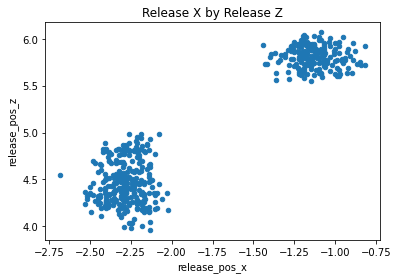

In [9]:
garzaR_df.plot.scatter(x="release_pos_x", y="release_pos_z", title = "Release X by Release Z")

#HOW TO SET EACH SECTION OF DOTS AS A DIFFERENT COLOR???

<div class="alert alert-info">


* Looking at a third variable
    
    
* Quick way to do this with a scatter plot is to use `sns.scatterplot` and add a `hue` argument


</div>


<AxesSubplot:xlabel='release_pos_x', ylabel='release_pos_z'>

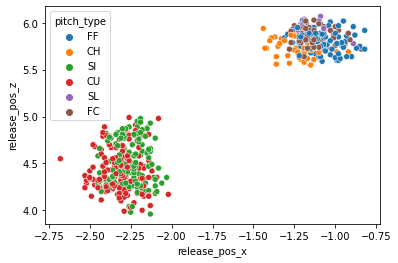

In [25]:
sns.scatterplot(data=garzaR_df,
                x="release_pos_x", 
                y="release_pos_z",
                hue='pitch_type'
               )

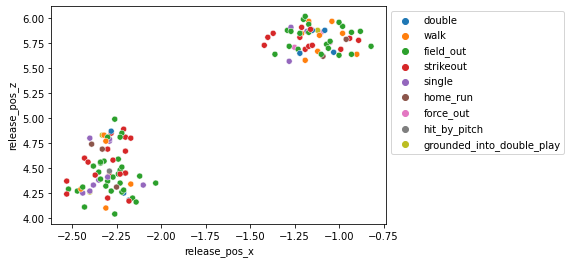

In [30]:
#HOW TO SET EACH SECTION OF DOTS AS A DIFFERENT COLOR???

# easiest way is to use the seaborn scatterplot function and
# use the hue argument

sns.scatterplot(data=garzaR_df,
                x="release_pos_x", 
                y="release_pos_z",
                hue='events'
               )

plt.legend(bbox_to_anchor=(1,1))


### Ralpha Garza Release Point by Pitch Speed

In [10]:
bins = pd.cut(garzaR_df['release_speed'], [73, 76, 79, 82, 85, 89, 92, 95])

speedBYReleasepoint = garzaR_df.groupby(bins)['release_pos_z'].mean()

print("Velocity speeds in bins by release point Z")
speedBYReleasepoint

Velocity speeds in bins by release point Z


release_speed
(73, 76]    4.505909
(76, 79]    4.486091
(79, 82]    5.500625
(82, 85]    5.733000
(85, 89]    5.060909
(89, 92]    4.983575
(92, 95]    5.797458
Name: release_pos_z, dtype: float64

## Q1. Create a notebook that focuses on analyzing your data

* Create a notebooks in the `data_analysis` folder of your group's project folder to carry out some analysis of your data to answer some questions related to your group's overall research question.


* The notebook(s) should be organized into a series of blocks that follow the:
    * _question_
    * _steps_
    * _code_
    * _answer_
    * _interpretation/observation_ 
    
  sequence we have talked about.


* These steps are:
    1. **QUESTION**: What is the question you are going to answer in this block, e.g.
        * _How many crashes in Philadelphia in 2013 involved SUVs or large trucks?_
        * _Which zipcodes reported the highest proportion of children with high lead blood levels?_
        * _Is the proportion of the population living in urban areas increasing in counties in the African continent?_
       
       _(The typology of kinds of data story components can be helpful. Try to use a number of the different kinds)_ <br/><br/>
       
       ACTUAL QUESTIONS
       *_
       
    2. **STEPS**: Lay out the conceptual analysis steps to go from your data to the answer. Do this in bullet points in Markdown, e.g. for the first question above, these would be:
       1. _Create filters for rows where `year` is 2013 and `SUV_count` or `large_truck_count` greater than 0_
       2. _Subset the complete crash data frame_
       3. _Count the number of rows_ <br/><br/>
    3. **CODE**: Implement these steps in one or more code cell(s). Remember to include comments, e.g.:
       ```
       # Create filters for rows where 'year' is 2013 and 'SUV_count' or 'large_truck_count' greater than 0
       y2013_filter = crash_df['year']==2013
       suv_filter = crash_df['SUV_count']>0
       large_truck_filter = crash_df['large_truck_count']>0
       
       # Subset the complete crash data frame
       suv_truck_2013_df = crash_df[(y2013_filter) & (suv_filter | large_truck_filter)]
       
       # Count the number of rows
       crash_num = suv_truck_2013_df.shape[0]
       ``` 
       <br/><br/>
    4. **ANSWER**: State the answer in narrative form (in a Markdown cell). <br/><br/>
    5. **INTERPRETATION/OBSERVATION**: Add some observations and interpretations of what you have found. Also remember to note follow up questions that become relevant after answering the question.
    
    
    
#### NOTES

* Examples can be found in these notebooks:
    * `comm318_F21_Data_Stories_Part1_and_initial_data_exploration_10-11-21/use_of_data_in_stories_part1.ipynb`
    * `comm318_F21_Data_Stories_Part2_10-18-21/use_of_data_in_stories_part2.ipynb`


* The type of questions you ask and apply these steps to will vary depending on your specific project.


* Try to include at least 5 blocks following steps 1-5 for each. You can include more than this of course!


---------

* Copy the name of the notebook you created below: